In [4]:
#Importing the pandas for data processing and numpy for numerical
import numpy as np
import pandas as pd
# Importing the Boston Housing dataset from the sklearn
# from sklearn.datasets import load_boston
boston = pd.read_csv('boston.csv')
#Converting the data into pandas dataframe
data = boston
#First look at the data
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.isnull().sum()


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<ipython-input-7-0cca034db7bb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.medv)


<Axes: xlabel='medv', ylabel='Density'>

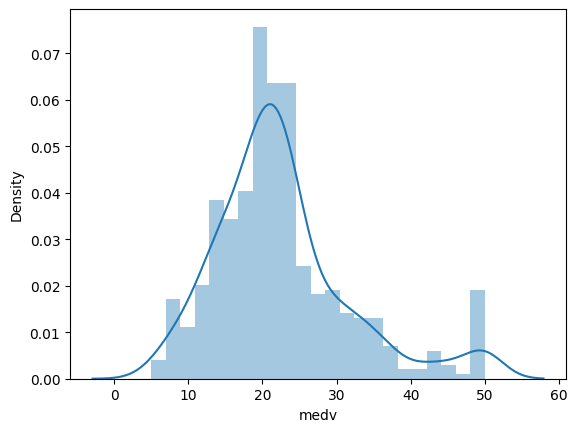

In [7]:
import seaborn as sns
sns.distplot(data.medv)


In [10]:
X = data.iloc[:,:-1]
y= data.medv

In [18]:
!pip install sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=42)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#Fitting the model
regressor.fit(X_train,y_train)
# Model Evaluation
#Prediction on the test dataset
y_pred = regressor.predict(X_test)
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)


4.638689926172818


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Creating the neural network model
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim =13))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1))
#model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.compile(optimizer = 'adam',loss ='mean_squared_error',metrics=['mae'])

In [21]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
11/11 [==============================] - 3s 57ms/step - loss: 604.5126 - mae: 22.7088 - val_loss: 531.0839 - val_mae: 21.4394
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 559.8112 - mae: 21.7249 - val_loss: 470.9380 - val_mae: 20.0894
Epoch 3/100
11/11 [==============================] - 0s 11ms/step - loss: 465.6651 - mae: 19.5135 - val_loss: 339.6133 - val_mae: 16.7338
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 285.1761 - mae: 14.4577 - val_loss: 136.0226 - val_mae: 9.3711
Epoch 5/100
11/11 [==============================] - 0s 16ms/step - loss: 110.6608 - mae: 8.4498 - val_loss: 71.1588 - val_mae: 5.2711
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 76.7147 - mae: 6.8150 - val_loss: 62.1887 - val_mae: 4.8988
Epoch 7/100
11/11 [==============================] - 0s 18ms/step - loss: 45.8577 - mae: 5.1898 - val_loss: 58.7747 - val_mae: 4.7840
Epoch 8/100
11/11 [=============================

In [22]:
y_pred = model.predict(X_test)
mse_nn, mae_nn = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 9.7103 - mae: 2.0845


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)
0.8812832788381159

0.8696838505981745


0.8812832788381159